In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

# Set de datos:

ID_PER: Identificador de persona.

SENTENCIA: Respecto al(los) delito(s) por el(los) cual(es) se le acusó, y por el(los) cual(es) se encuentra en este centro ¿el juez...
	1= NO le ha dictado sentencia por ningún delito (es decir, no le ha dicho cuánto tiempo permanecerá recluido en un centro penitenciario)?
	2= le dictó sentencia por algunos delitos y por otros aún está en espera?
	3= ya dictó sentencia por (todos) el/los delito(s) (es decir, ya le dijo cuánto tiempo permanecerá recluido en un centro penitenciario)?
	8= No sabe
	9= No responde
    
AN_RECLUSION: ¿Cuánto tiempo le dijo el Juez que permanecería recluido en un Centro penitenciario? (años)
	01…96= Años
	00= No aplica
	97= 97 años o más
	98= No sabe
	99= No responde
	b= blanco

MES_RECLUSION: (cantidad en meses)
	01…96= Meses
	00= No aplica
	97= 97 años o más
	98= No sabe
	99= No responde
	b= blanco

TIEM_SENTENCIA: Desde su llegada al Centro penitenciario, ¿cuánto tiempo transcurrió para que el Juez le dictara sentencia?
	1= Hasta una semana
	2= Hasta dos semanas
	3= Hasta un mes
	4= Hasta seis meses
	5= Hasta un año
	6= Hasta dos años
	7= Más de dos años
	8= No sabe
	9= No responde
	b= blanco
    
¿Por cuál(es) delito(s) fue sentenciado(a)?
ROBO_VEHICULO: Robo de vehículo
ROBO_CASA: Robo a casa habitación
ROBO_NEG: Robo a negocio
ROBO_PUBLIC: Robo a transeúnte en vía pública
ROBO_AUTOPART: Robo de autopartes
ROB_DISTIN: Robo en forma distinta a las anteriores
POS_DROGAS: Posesión ilegal de drogas
COM_DROGAS  :Comercio ilegal de drogas
LESIONES :Lesiones
HOMICIDIO :Homicidio
ARMAS_ILEG :Portación ilegal de armas 
ASIS_FAMILIAR :Incumplimiento de obligaciones de asistencia familiar
VIOL_FAMILIAR :Violencia familiar
DAN_PROPIEDAD :Daño a la propiedad
SECUESTRO :Secuestro y secuestro exprés
VIO_SEXUAL :Violación sexual
FRAUDE: Fraude
HOSTIG_SEXUAL :Hostigamiento sexual, manoseo, exhibicionismo o intento de violación
EXTORSION :Extorsión
DESPOJO :Despojo
ALLANAMIENTO :Allanamiento de morada
PRIVACION_LIB :Privación de la libertad
ABUS_CONFIANZA :Abuso de confianza
AMENAZAS: Amenazas
OTRO :Otro delito
NO_SABE :No sabe
NO_RESPONDE: No responde
	0= No se declaró como respuesta afirmativa
	1= Sí
       
SEXO
	1= Hombre
	2= Mujer
    
CENTRO: Identifique el tipo de Centro
		1= Centro varonil
		2= Centro femenil

EDAD: ¿Cuántos años cumplidos tiene?
		19...96= Edad
		97= 97 años o más
		98= No sabe
		99= No responde
        
PAIS: En qué país nació?
		1= México
		2= Estado Unidos
		3= Otro
		8= No sabe
		9= No responde
        
ES_CIVIL: Actualmente, ¿usted...
		1= está soltero?
		2= está casado?
		3= está en unión libre?
		4= está separado de un matrimonio?
		5= está separado de una unión libre?
		6= está divorciado?
		7= está viudo?
		8= No sabe
		9= No responde
		
HIJOS: ¿Tiene hijos?
		1= Sí
		2= No
		8= No sabe
		9= No responde

P1_20 : 
	¿Habla usted alguna lengua nacional distinta al español como Náhuatl, Maya, Tseltal, Mixteco, Tsotsil, etcétera?//LENGUAJE
		1= Sí
		2= No
		8= No sabe
		9= No responde
	
	
LEER: ¿Sabe leer?
		1= Sí
		2= No
		8= No sabe
		9= No responde
	
ESCRIBIR:  ¿Sabe escribir?
		1= Sí
		2= No
		8= No sabe
		9= No responde
		
	
NIVEL_ESCOLAR : ¿Hasta qué año o grado aprobó en la escuela?
		00= Ninguno
		01= Preescolar
		02= Primaria
		03= Secundaria
		04= Carrera técnica con secundaria terminada
		05= Normal Básica (con antecedentes en secundaria)
		06= Preparatoria o bachillerato
		07= Carrera técnica con preparatoria terminada
		08= Licenciatura o profesional
		09= Maestría o doctorado
		98= No sabe
		99= No responde
		
R_ABAN_ESTUD : ¿Por qué no estudió/continuó estudiando?
		01= Tuvo que trabajar
		02= No tenía dinero para ir a la escuela
		03= No le gustaba/no le interesaba la escuela/no se le daba la escuela/le daba flojera
		04= Lo expulsaron de la escuela
		05= Se casó/tuvo hijos
		06= Ingresó a prisión
		07= Tenía que cuidar a algún familiar
		08= Problemas de salud
		09= Le quedaba lejos la escuela
		10= Cerró la escuela
		11= Lo agredían en la escuela
		12= Otro
		98= No sabe
		99= No responde
		b= blanco

NOM_ENT : Justo antes de su arresto, ¿en qué estado (entidad federativa) vivía? 
	Catalogo de entidad
    
VIVIENDA : La vivienda que usted habitaba justo antes de su reclusión era...
	01= casa independiente?
	02= departamento en edificio?
	03= cuarto en vecindad?
	04= cuarto de azotea?
	05= en un local?
	06= carro o camión?
	07= en un cuarto de hotel?
	08= en la calle?
	09= en alguna institución (albergue, casa hogar, asilo)?
	10= Otro
	98= No sabe
	99= No responde

VIVIENDA_EST : ¿La vivienda en la que habitaba era/estaba
	1= propia?
	2=rentada?
	3=prestada?
	4=en proceso de compra?
	5=intestada o en litigio?
	6=en un terreno invadido por paracaidistas?
	7=Otro
	8=No sabe
	9=No responde
	b= blanco

OCUPACION : Antes de ser recluido, ¿a qué se dedicaba?
	01= profesionista o técnico
	02= empresario
	03= trabajador auxiliar en actividades administrativas
	04= comerciante, empleados en ventas y agentes de ventas
	05= comerciante informal
	06= miembro del Ejército
	07= miembro de la Marina
	08= miembro de la Policía Municipal, Estatal, Judicial o Ministerial
	09= miembro de la Policía Federal
	10= funcionario público
	11= trabajador en servicios personales y vigilancia
	12= trabajador en actividades agrícolas, ganaderas, forestales, caza y pesca
	13= trabajador artesanal
	14= operador de maquinaria industrial, ensamblador, chofer y conductor
	15= negocios chuecos, al “bisne”, a la tranza, etcétera?(actividades ilegales)
	16= Otro
	98= No sabe
	99= No responde


T_TRABAJO:  La semana previa a su reclusión, ¿usted...
(a qué se dedicaban)
	1= trabajó?
	2= tenía trabajo, pero esa semana no trabajó? 
	3= buscó trabajo?
	4= era estudiante?
	5= se dedicaba a los quehaceres del hogar? 
	6= era jubilado(a) o pensionado(a)?
	7= estaba incapacitado(a) permanentemente para trabajar? 
	8= no trabajó? 
	98= No sabe
	99= No responde

ACT_REMUNERADAS : Además de (CONDICIÓN EN 2.12), ¿la semana previa a su reclusión usted...
	1=  vendió o hizo algún producto para su venta?
	2= prestó algún servicio a cambio de un pago (cortar el cabello, dar clases, lavar o planchar ropa ajena)?
	3= ayudó trabajando en las tierras o en el negocio de un familiar u otra persona?
	4= Entonces, ¿no trabajó? 
	8= No sabe
	9= No responde
	b= blanco
    
RA_DESEMPLEO : ¿Por qué no había trabajado?
	01= Porque no encontraba trabajo
	02= Por problemas de salud
	03= Por responsabilidades familiares
	04= Porque estaba estudiando
	05= Porque no necesitaba trabajar
	06= Porque no quería trabajar
	07= Porque se dedicaba a los quehaceres del hogar
	08= Porque estaba jubilado o pensionado
	09= Porque estaba incapacitado permanentemente para trabajar
	10= Porque tenía problemas de adicciones
	11= Porque tenía un trabajo ilegal
	12= Por tener antecedentes penales
	13= Otro
	98= No sabe
	99=	No responde
	b= blanco
 
 
OCUPACION_2 : En su trabajo, negocio o actividad de la semana previa a su reclusión, ¿usted fue ...
	1= jornalero o peón? 
	2= empleado u obrero?
	3= trabajador por su cuenta(no contrata trabajadores)?
	4= patrón o empleador (contrata trabajadores)?
	5= trabajador sin pago?
	8= No sabe
	9= No responde
	b= blanco

FUEN_INGRESOS = Dígame entonces, ¿cuál era su principal fuente de ingresos? (no importa si era legal o ilegal)
	01= Un familiar me daba dinero 
	02= Un amigo me daba dinero
	03= Pedía dinero en las calles
	04= Ayuda o programa de alguna institución de gobierno
	05= Vendía o realizaba algún producto para su venta
	06= Ofrecía algún servicio a cambio de un pago
	07= Ayudó trabajando en las tierras o en el negocio de un familiar u otra persona
	08= Negocios chuecos, “bisnes”, tranzas, etcétera (actividades ilegales)
	09= Otra actividad
	98= No sabe
	99= No responde
	b= blanco
    
DELITO_ANT: Antes de su reclusión en este centro, ¿usted había sido juzgado por un delito?
	1= Sí
	2= No
	8= No sabe
	9= No responde
	
DELITO_VEC: ¿Cuántas veces?
	01...97: 
	98: No sabe
	99: No responde
	b= blanco

¿Por qué tipo de delitos?
	DEL_AN_VEHICULO: Robo de vehículo
	DEL_AN_CASA: Robo a casa habitación
	DEL_AN_ROBONEGOCIO: Robo a negocio
	DEL_AN_ROBOVIA: Robo a transeúnte en vía pública
	DEL_AN_AUTOPART: Robo de auto partes
	DEL_AN_ROBODIS: Robo en forma distinta a las anteriores
	DEL_AN_PDROGAS: Posesión ilegal de drogas
	DEL_AN_CDROGAS: Comercio ilegal de drogas
	DEL_AN_LESIONES: Lesiones
	DEL_AN_HOMICIDIO: Homicidio
	DEL_AN_ARMAS: Portación ilegal de armas
	DEL_AN_INCUM: Incumplimiento de obligaciones de asistencia familiar
	DEL_AN_VIOFAM: Violencia familiar
	DEL_AN_DANPROPIEDAD: Daño a la propiedad
	DEL_AN_SECUESTRO: Secuestro y secuestro exprés
	DEL_AN_VIOLA: Violación sexual
	DEL_AN_FRAUDE: Fraude
	DEL_AN_HOSTIG: Hostigamientosexual, manoseo, exhibicionismo o intentode violación
	DEL_AN_EXTORSION: Extorsión
	DEL_AN_DESPOJO: Despojo
	DEL_AN_ALLANAMIENTO: Allanamiento de morada
	DEL_AN_PRIV: Privación de la libertad
	DEL_AN_ABUSOCON: Abuso de confianza
	DEL_AN_AMENAZAS: Amenazas
	DEL_AN_OTRO: Otro delito
	DEL_AN_NOSABE: No sabe
	DE_AN_NORESPONDE: No responde
    
REAL_MONTH:
    Suma de columnas AN_RECLUSION y MES_RECLUSION (conversión en meses de tiempo de sentencia)
    
    
Para mayor información: https://www.inegi.org.mx/programas/enpol/2016/

In [2]:
mainDataSet = pd.read_csv('./mainDataSet_3.csv')

In [3]:
mainDataSet.columns

Index(['Unnamed: 0', 'ID_PER', 'SENTENCIA', 'AN_RECLUSION', 'MES_RECLUSION',
       'TIEM_SENTENCIA', 'ROBO_VEHICULO', 'ROBO_CASA', 'ROBO_NEG',
       'ROBO_PUBLIC', 'ROBO_AUTOPART', 'ROB_DISTIN', 'POS_DROGAS',
       'COM_DROGAS', 'LESIONES', 'HOMICIDIO', 'ARMAS_ILEG', 'ASIS_FAMILIAR',
       'VIOL_FAMILIAR', 'DAN_PROPIEDAD', 'SECUESTRO', 'VIO_SEXUAL', 'FRAUDE',
       'HOSTIG_SEXUAL', 'EXTORSION', 'DESPOJO', 'ALLANAMIENTO',
       'PRIVACION_LIB', 'ABUS_CONFIANZA', 'AMENAZAS', 'OTRO', 'NO_SABE',
       'NO_RESPONDE', 'REAL_MONTH', 'SEXO', 'CENTRO', 'EDAD', 'PAIS',
       'ES_CIVIL', 'HIJOS', 'LENGUAJE', 'LEER', 'ESCRIBIR', 'NIVEL_ESCOLAR',
       'R_ABAN_ESTUD', 'NOM_ENT', 'VIVIENDA', 'VIVIENDA_EST', 'OCUPACION',
       'T_TRABAJO', 'ACT_REMUNERADAS', 'RA_DESEMPLEO', 'OCUPACION_2',
       'FUEN_INGRESOS', 'DELITO_ANT', 'DELITO_VEC', 'DEL_AN_VEHICULO',
       'DEL_AN_CASA', 'DEL_AN_ROBONEGOCIO', 'DEL_AN_ROBOVIA',
       'DEL_AN_AUTOPART', 'DEL_AN_ROBODIS', 'DEL_AN_PDROGAS', 'DEL_AN_CD

In [4]:
mainDataSet.describe(include='all')

,Unnamed: 0,ID_PER,SENTENCIA,AN_RECLUSION,MES_RECLUSION,TIEM_SENTENCIA,ROBO_VEHICULO,ROBO_CASA,ROBO_NEG,ROBO_PUBLIC,...,DEL_AN_HOSTIG,DEL_AN_EXTORSION,DEL_AN_DESPOJO,DEL_AN_ALLANAMIENTO,DEL_AN_PRIV,DEL_AN_ABUSOCON,DEL_AN_AMENAZAS,DEL_AN_OTRO,DEL_AN_NOSABE,DE_AN_NORESPONDE
count,58127.000000,5.812700e+04,58127.000000,58127.000000,58127.000000,58127.000000,58127.000000,58127.000000,58127.000000,58127.000000,...,58127.000000,58127.000000,58127.000000,58127.000000,58127.000000,58127.000000,58127.000000,58127.000000,58127.000000,58127.000000
mean,29063.000000,1.966323e+06,2.407590,11.786276,3.963542,5.440730,0.115421,0.064592,0.063302,0.060316,...,0.003803,0.005141,0.005352,0.013028,0.004577,0.005986,0.005282,0.058803,0.023239,0.002817
std,16779.963886,3.571282e+05,0.970236,16.840591,9.953441,1.049624,0.263488,0.202694,0.200797,0.196317,...,0.030422,0.035347,0.036063,0.056047,0.033364,0.038126,0.035826,0.116278,0.074467,0.026196
min,0.000000,1.000002e+06,1.000000,0.000961,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14531.500000,2.020944e+06,1.000000,0.000961,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.003803,0.005141,0.005352,0.013028,0.004577,0.005986,0.005282,0.058803,0.023239,0.002817
50%,29063.000000,2.077589e+06,3.000000,6.000000,3.963542,5.440730,0.000000,0.000000,0.000000,0.000000,...,0.003803,0.005141,0.005352,0.013028,0.004577,0.005986,0.005282,0.058803,0.023239,0.002817
75%,43594.500000,2.131398e+06,3.000000,16.000000,3.963542,6.000000,0.115421,0.064592,0.063302,0.060316,...,0.003803,0.005141,0.005352,0.013028,0.004577,0.005986,0.005282,0.058803,0.023239,0.002817
max,58126.000000,3.000989e+06,9.000000,99.000000,99.000000,9.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


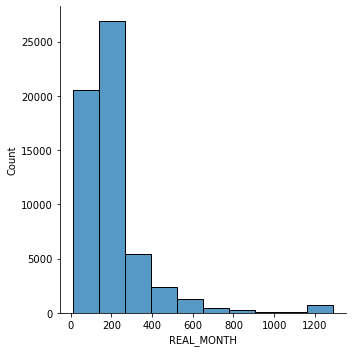

In [21]:
sns.displot(mainDataSet, x='REAL_MONTH', bins=10)

# Entrenamiento

Definición de la columna "REAL MONTH" como variable target (cantidad de meses en prisión)

In [6]:
Y = mainDataSet['REAL_MONTH']

Variables predictoras

In [7]:
X = mainDataSet[[ 'SENTENCIA',
       'TIEM_SENTENCIA', 'ROBO_VEHICULO', 'ROBO_CASA', 'ROBO_NEG',
       'ROBO_PUBLIC', 'ROBO_AUTOPART', 'ROB_DISTIN', 'POS_DROGAS',
       'COM_DROGAS', 'LESIONES', 'HOMICIDIO', 'ARMAS_ILEG', 'ASIS_FAMILIAR',
       'VIOL_FAMILIAR', 'DAN_PROPIEDAD', 'SECUESTRO', 'VIO_SEXUAL', 'FRAUDE',
       'HOSTIG_SEXUAL', 'EXTORSION', 'DESPOJO', 'ALLANAMIENTO',
       'PRIVACION_LIB', 'ABUS_CONFIANZA', 'AMENAZAS', 'OTRO', 'SEXO', 'CENTRO', 'EDAD', 'PAIS',
       'ES_CIVIL', 'HIJOS', 'LENGUAJE', 'LEER', 'ESCRIBIR', 'NIVEL_ESCOLAR',
       'R_ABAN_ESTUD', 'NOM_ENT', 'VIVIENDA', 'VIVIENDA_EST', 'OCUPACION',
       'T_TRABAJO', 'ACT_REMUNERADAS', 'RA_DESEMPLEO', 'OCUPACION_2',
       'FUEN_INGRESOS', 'DELITO_ANT', 'DELITO_VEC']]

Train, Test y Split

In [8]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.25, random_state=25)

Validación de la partición de las variables entrenamiento en un 75%

In [9]:
x_train.shape

(43595, 49)

Validación de la partición de las variables de pruebas en un 25%

In [10]:
x_test.shape

(14532, 49)

Asignación del modelo de regresión lineal en una variable

In [22]:
lm = linear_model.LinearRegression()

Comenzar entrenamiento del modelo con la función fit y como argumentos pasar el set de entrenamiento 

In [12]:
model = lm.fit(x_train, y_train)

Generar predicciones utilizando la función predict y pasando como argumento el set de prueba de las variables predictoras (X)

In [13]:
predictions = lm.predict(x_test)

Generar la visualización para comparar las predicciones del modelo contra los valores reales de la variable target y el set de pruebas de y_test

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='REAL_MONTH'>

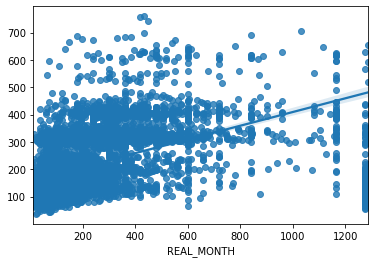

In [14]:
sns.regplot(y_test,predictions)

Calcular el score del modelo realizado, utilizando x_test y y_test (variables del set de datos de prueba)

In [15]:
model.score(x_test,y_test)

0.2541666333805971

Coeficientes del modelo para las variables X (qué variables aumentan positiva y negativamete al momento de dictar sentencia a una persona privada de su libertad)

In [16]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

In [17]:
coeff_parameter

,Coefficient
SENTENCIA,-0.977715
TIEM_SENTENCIA,7.010156
ROBO_VEHICULO,24.156991
ROBO_CASA,7.596478
ROBO_NEG,7.897206
ROBO_PUBLIC,-11.291584
ROBO_AUTOPART,24.009380
ROB_DISTIN,12.138953
POS_DROGAS,73.847237
COM_DROGAS,-26.487853


Valor con qué se intercepta la recta con el eje

In [18]:
lm.intercept_

30.53527295384376

Almacenamiento de las variables predictoras del modelo

In [19]:
predict_dataset = lm.predict(X)
mainDataSet['predicted'] = predict_dataset

Qué tan preciso es el modelo

In [20]:
metrics.r2_score(Y,mainDataSet['predicted'])

0.25689232340797463